# Reinforcement Learning for Navigation in Grid-Based Environments: Q-Learning Agent to Achieve Goals While Avoiding Obstacles

## Introduction

In this project, I want to demonstrate the implementation of a Reinforcement Learning (RL) algorithm, specially Q-Learning, to train an agent in a simple grid-based environment. The agent must navigate from a starting position to a goal while avoiding obstacles, learning through trial and error. The environment provides feedback using a reward system, encouraging the agent to achieve the goal efficiently while minimizing collisions and unnecessary movements. By using concepts such as exploration vs. exploitation, state-action learning, and reward-based feedback, this project provides an intuitive understanding of RL fundamentals. It also incorporates performance visualization, allowing an analysis of the agent's improvement over time. The project is a foundational step toward understanding RL concepts and their practical applications in AI and robotics.

## Breaking the Project Down

As mentionned before, this script implements a Reinforcement Learning (RL) algorithm using Q-Learning to train an agent in a grid-based environment. The agent learns to navigate toward a goal (green circle) while avoiding obstacles (red circles). Here’s a detailed breakdown:

#### Concepts Demonstrated

1. Reinforcement Learning Basics:
   * State, action, reward, policy.
   * Q-Learning for policy optimization.
2. Q-Learning Key Features:
   * Off-policy learning: Does not require learning from trajectories that follow the optimal policy.
   * Value-based method: Learns the utility of state-action pairs.
3. Agent Training:
   * Explores initially and gradually exploits learned knowledge.
   * Improves efficiency and avoids penalties over time.

#### 1. Environment Setup

The game grid represents the environment: 
* **State Space**: The grid cells represent states; each cell is identified by its row and column position.
* **Action Space**: The agent can take one of four actions at each step:
  * 0: Move up
  * 1: Move down
  * 2: Move left
  * 3: Move right
* **Reward System**:
  * +100: Reaching the goal (green circle)
  * -50: Colliding with an obstacle (red circles)
  * -0.1: Small penalty for every move to encourage efficient paths

#### 2. Reinforcement Learning Algorithm

The script uses Q-Learning, a model-free RL algorithm that learns an optimal policy for decision-making. Here’s how Q-Learning works in this script: <br />
1. **Q-Table**
   * The Q-Table is a 3D matrix:
     * Dimensions: (number_of_rows, number_of_columns, number_of_actions)
     * Each entry $Q(s,a)$ stores the estimated utility (expected reward) of taking action $a$ in state        $s$
  
2. **Q-Value Update Rule**

    When the agent takes an action, the Q-value for the current state-action pair is updated using the formula: $Q(s,a)←Q(s,a)+α(r+γ maxQ(s′,a′)−Q(s,a))$

    Where:
   * **$α$ (Learning Rate)**: Determines how much new information overrides the old value.
   * **$γ$ (Discount Factor)**: Controls how much future rewards are valued compared to immediate rewards.
   * **$r$**: The reward received after taking action $𝑎$ a from state $𝑠$.
   * **$max_{a′}Q(s′,a′)$**: The maximum expected reward from the next state $𝑠′$.
3. **Exploration vs. Exploitation**

   The agent balances exploration (choosing random actions to explore the environment) and exploitation (choosing actions with the highest Q-value) using the epsilon-greedy strategy:

   * A random action is chosen with probability **$𝜖$** (exploration).
   * The action with the highest Q-value is chosen with probability $1 − 𝜖$ (exploitation).
   * $ϵ$ decays over time, encouraging the agent to exploit more as it learns.
4. **Reward Feedback**

    Rewards guide the agent toward better behavior:

   * A positive reward for reaching the goal encourages the agent to aim for the goal.
   * A negative reward for hitting obstacles penalizes unsafe actions.
   * A small penalty for moving ensures the agent minimizes unnecessary steps.

#### 3. Game Logic

**Initialization**:
  * **Grid Setup**: The environment is a fixed grid (5x5 in this case).
  * **Agent Placement**: Starts at the top-left corner.
  * **Goal and Obstacles**: Fixed positions for consistent learning.

**Training Loop**:
  * The agent selects an action (exploration or exploitation).
  * The action is executed, updating the agent's position.
  * The reward for the action is calculated.
  * The Q-value is updated using the Q-Learning formula.
  * If the agent reaches the goal or hits an obstacle, the episode ends, and the agent resets.

**Metrics Tracking**:
  * **Scores**: Tracks rewards accumulated in each episode.
  * **Steps Per Episode**: Tracks how many moves the agent took.
  * **Exploration Decay**: Epsilon decays to encourage exploitation over time.

#### 4. Key Parameters

* **Learning Rate $(𝛼 = 0.1)$**: Determines the impact of new information on the Q-values.
* **Discount Factor $(𝛾 = 0.9)$**: Prioritizes future rewards while still valuing immediate ones.
* **Exploration Rate $(𝜖 = 0.3)$**: Encourages exploration initially, then reduces gradually.

#### 5. Visualization and Evaluation

* **Grid Visualization**: Displays the agent, goal, and obstacles.
* **Metrics Plots**:
    * **Scores**: Evaluates performance improvement over episodes.
    * **Steps**: Tracks learning efficiency (fewer steps indicate better learning).
* **Episode Logging**: Prints score, steps, and time for each episode.

#### 6. Improvements Over Time

The agent initially explores, making random actions and colliding with obstacles. As training progresses:

  * The agent learns to avoid obstacles by associating actions leading to them with negative rewards.
  * It learns the shortest path to the goal due to positive reinforcement.

## Breaking the Script Down

#### Imports

In this cell, let's import **pygame** library for creating games and handling graphics and events. We will use it to render the grid, agent, and rewards. We will import **numpy** for numerical computations, and it will be used to initialize and manager the Q-table. Also, we will need **random** and **time** for randomness and duration measurment of each episode. Finally, the **matplotlib** for visualizing metrics like scoes and steps per episode.

In [2]:
import pygame
import numpy as np
import random
import time
import matplotlib.pyplot as plt

#### Game Setup

Here we will initialize the Pygame library and sets up the necessary modules for graphics and events. We will define the screen dimensions to be 400x400 pixels, and the size of each cell in the grid to be 80x80 pixels. The **ROWS** and **COLS** store the number of rows and columns in the grid (5x5).

We will define colors in RGB format. They are used to render the agent, goal, and obstacles. Then, we will create the game window using the function **pygame.display.set_mode()** and set the title to "Reinforcement Learning Game".

Finally, we will define game elements, starting by the agent that starts at the top-left corner ([0,0]), the goal position (the green circle), which is at the bottom-right corner ([4,4]), and the red circles (obstacles) placed at some fixed positions.

In [3]:
pygame.init()

WIDTH, HEIGHT = 400, 400
GRID_SIZE = 80
ROWS, COLS = HEIGHT // GRID_SIZE, WIDTH // GRID_SIZE

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Reinforcement Learning Game")

agent_pos = [0, 0]
goal_pos = [ROWS - 1, COLS - 1]
red_circles = [[2, 3], [4, 2]]  # Fixed positions for negative rewards
green_circle = [ROWS - 1, COLS - 1]  # Goal

#### Q-Learning Setup

In the following, we will start by initializing the Q-table, which is a 3D array where each state-action pair has a Q-value. Its dimensions are **ROWS x COLS x ACTIONS**.

Further, we will define RL parameters:
* Learning Rate: which determines how much new information overrivides old Q-value.
* Discount Rate: that balances immediate vs. future rewards.
* Epsilon: which controls exploration (random actions) vs. exploitation (choosing the best action).

Then, We need to track performance metrics for each episode. So we will have **scores**, the total rewards per episode, **time_spent**, the duration of each episode, and **steps_per_episode**, the number of steps taken.

In [5]:
Q_table = np.zeros((ROWS, COLS, 4))  # Actions: 0=up, 1=down, 2=left, 3=right

LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EPSILON = 0.3

scores = []
time_spent = []
steps_per_episode = []
start_time = time.time()
score = 0
steps = 0

#### Helper Functions

First of all we will define the function **reset()**, which resets the agent's position, score, and step counter for a new episode.

We will draw the grid and visualize the goal, obstacles, and agent on the screen, using the **draw_grid()** function. 

Then, we will go to update the agent's position based on the chosen action using **move_agent()** function.

After that, using the **get_reward()** function, we will be able to calculate the rewards:
  * +100 for reaching the goal.
  * -50 for hitting an obstacle.
  * -0.1 for each step to discourage unnecessary movement.

Then, we will train the Q_Learning by using the **train_q_learning()** based on the **Exploration vs. Exploitation** concept:
  * With probability $𝜖$, choose a random action (exploration).
  * Otherwise, choose the action with the highest Q-value (exploitation).

Finally, we will visualize performance metrics (scores and steps) over episodes using **plot_metrics()** function.

In [6]:
def reset():
    """Reset the agent's position and environment."""
    global agent_pos, score, steps, start_time
    agent_pos = [0, 0]
    start_time = time.time()
    steps = 0  # Reset step counter for the episode


def draw_grid():
    """Draw the grid, agent, and rewards."""
    screen.fill(WHITE)
    for x in range(0, WIDTH, GRID_SIZE):
        pygame.draw.line(screen, BLACK, (x, 0), (x, HEIGHT))
    for y in range(0, HEIGHT, GRID_SIZE):
        pygame.draw.line(screen, BLACK, (0, y), (WIDTH, y))

    # Draw goal (green circle)
    pygame.draw.circle(screen, GREEN,
                       (green_circle[1] * GRID_SIZE + GRID_SIZE // 2, green_circle[0] * GRID_SIZE + GRID_SIZE // 2),
                       GRID_SIZE // 3)
    # Draw negative rewards (red circles)
    for red in red_circles:
        pygame.draw.circle(screen, RED, (red[1] * GRID_SIZE + GRID_SIZE // 2, red[0] * GRID_SIZE + GRID_SIZE // 2),
                           GRID_SIZE // 3)
    # Draw agent
    pygame.draw.rect(screen, BLUE, (agent_pos[1] * GRID_SIZE, agent_pos[0] * GRID_SIZE, GRID_SIZE, GRID_SIZE))


def move_agent(action):
    """Move the agent based on the selected action."""
    global agent_pos
    if action == 0 and agent_pos[0] > 0:  # Up
        agent_pos[0] -= 1
    elif action == 1 and agent_pos[0] < ROWS - 1:  # Down
        agent_pos[0] += 1
    elif action == 2 and agent_pos[1] > 0:  # Left
        agent_pos[1] -= 1
    elif action == 3 and agent_pos[1] < COLS - 1:  # Right
        agent_pos[1] += 1


def get_reward():
    """Return the reward for the agent's position."""
    global score
    if agent_pos == green_circle:
        score += 100
        return 100  # Reward for reaching the goal
    elif agent_pos in red_circles:
        score -= 50
        return -50  # Penalty for eating a red circle
    else:
        score -= 0.1  # Small penalty for each move
        return -0.1


def train_q_learning():
    """Train the agent using Q-Learning."""
    global EPSILON, steps
    state = tuple(agent_pos)
    action = random.choice(range(4)) if random.uniform(0, 1) < EPSILON else np.argmax(Q_table[state])
    old_pos = list(agent_pos)  # Save old position
    move_agent(action)
    steps += 1
    reward = get_reward()
    next_state = tuple(agent_pos)

    # Q-Learning update rule
    Q_table[state][action] += LEARNING_RATE * (
                reward + DISCOUNT_FACTOR * np.max(Q_table[next_state]) - Q_table[state][action])

    # Reset agent if goal or red circle reached
    if agent_pos == green_circle or agent_pos in red_circles:
        scores.append(score)
        steps_per_episode.append(steps)
        time_spent.append(time.time() - start_time)
        print(f"Episode {len(scores)}: Score = {score}, Steps = {steps}, Time = {time_spent[-1]:.2f}s")
        reset()

    EPSILON = max(0.01, EPSILON * 0.995)  # Gradually reduce exploration


def plot_metrics():
    """Plot scores and time spent after training."""
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(scores, label="Score")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.title("Scores Over Time")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(steps_per_episode, label="Steps")
    plt.xlabel("Episode")
    plt.ylabel("Steps Taken")
    plt.title("Steps Per Episode")
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Main Function

Here, we will run the training loop for a specified number of episodes, and call the training, drawing, and evaluation functions.

In [7]:
def main():
    clock = pygame.time.Clock()
    running = True
    episodes = 0
    max_episodes = 500

    while running and episodes < max_episodes:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        train_q_learning()
        draw_grid()
        pygame.display.flip()
        clock.tick(10)
        episodes += 1

    pygame.quit()
    plot_metrics()

#### The Whole Script

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Episode 1: Score = -53.4, Steps = 35, Time = 3.41s
Episode 2: Score = -105.10000000000002, Steps = 18, Time = 1.82s
Episode 3: Score = -160.39999999999972, Steps = 54, Time = 5.42s
Episode 4: Score = -217.09999999999934, Steps = 68, Time = 6.82s
Episode 5: Score = -268.9999999999992, Steps = 20, Time = 2.00s
Episode 6: Score = -321.1999999999997, Steps = 23, Time = 2.31s
Episode 7: Score = -229.1000000000015, Steps = 80, Time = 9.16s
Episode 8: Score = -131.40000000000137, Steps = 24, Time = 2.41s
Episode 9: Score = -36.70000000000107, Steps = 54, Time = 5.42s
Episode 10: Score = 54.89999999999881, Steps = 85, Time = 8.53s
Episode 11: Score = 151.29999999999876, Steps = 37, Time = 3.72s
Episode 12: Score = 249.39999999999887, Steps = 20, Time = 2.00s
Episode 13: Score = 346.199999999999, Steps = 33, Time = 3.31s
Episode 14: Score = 443.4999999999984, Steps = 28, Time = 2.81s

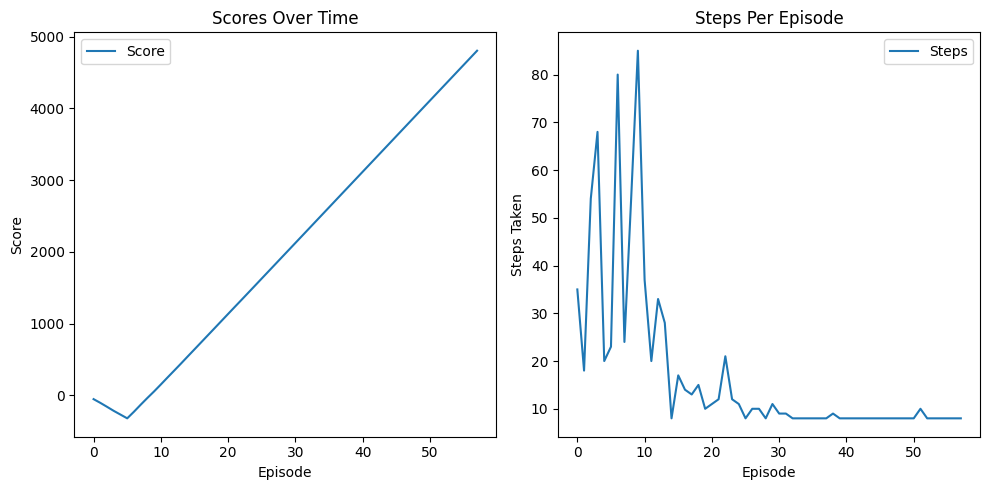

In [1]:
import pygame
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Initialize pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 400, 400
GRID_SIZE = 80
ROWS, COLS = HEIGHT // GRID_SIZE, WIDTH // GRID_SIZE

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)

# Initialize screen
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Reinforcement Learning Game")

# Agent and rewards
agent_pos = [0, 0]
goal_pos = [ROWS - 1, COLS - 1]
red_circles = [[2, 3], [4, 2]]  # Fixed positions for negative rewards
green_circle = [ROWS - 1, COLS - 1]  # Goal

# Q-Learning parameters
Q_table = np.zeros((ROWS, COLS, 4))  # Actions: 0=up, 1=down, 2=left, 3=right
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EPSILON = 0.3  # Exploration vs Exploitation

# Metrics
scores = []
time_spent = []
steps_per_episode = []
start_time = time.time()
score = 0
steps = 0


def reset():
    """Reset the agent's position and environment."""
    global agent_pos, score, steps, start_time
    agent_pos = [0, 0]
    start_time = time.time()
    steps = 0  # Reset step counter for the episode


def draw_grid():
    """Draw the grid, agent, and rewards."""
    screen.fill(WHITE)
    for x in range(0, WIDTH, GRID_SIZE):
        pygame.draw.line(screen, BLACK, (x, 0), (x, HEIGHT))
    for y in range(0, HEIGHT, GRID_SIZE):
        pygame.draw.line(screen, BLACK, (0, y), (WIDTH, y))

    # Draw goal (green circle)
    pygame.draw.circle(screen, GREEN,
                       (green_circle[1] * GRID_SIZE + GRID_SIZE // 2, green_circle[0] * GRID_SIZE + GRID_SIZE // 2),
                       GRID_SIZE // 3)
    # Draw negative rewards (red circles)
    for red in red_circles:
        pygame.draw.circle(screen, RED, (red[1] * GRID_SIZE + GRID_SIZE // 2, red[0] * GRID_SIZE + GRID_SIZE // 2),
                           GRID_SIZE // 3)
    # Draw agent
    pygame.draw.rect(screen, BLUE, (agent_pos[1] * GRID_SIZE, agent_pos[0] * GRID_SIZE, GRID_SIZE, GRID_SIZE))


def move_agent(action):
    """Move the agent based on the selected action."""
    global agent_pos
    if action == 0 and agent_pos[0] > 0:  # Up
        agent_pos[0] -= 1
    elif action == 1 and agent_pos[0] < ROWS - 1:  # Down
        agent_pos[0] += 1
    elif action == 2 and agent_pos[1] > 0:  # Left
        agent_pos[1] -= 1
    elif action == 3 and agent_pos[1] < COLS - 1:  # Right
        agent_pos[1] += 1


def get_reward():
    """Return the reward for the agent's position."""
    global score
    if agent_pos == green_circle:
        score += 100
        return 100  # Reward for reaching the goal
    elif agent_pos in red_circles:
        score -= 50
        return -50  # Penalty for eating a red circle
    else:
        score -= 0.1  # Small penalty for each move
        return -0.1


def train_q_learning():
    """Train the agent using Q-Learning."""
    global EPSILON, steps
    state = tuple(agent_pos)
    action = random.choice(range(4)) if random.uniform(0, 1) < EPSILON else np.argmax(Q_table[state])
    old_pos = list(agent_pos)  # Save old position
    move_agent(action)
    steps += 1
    reward = get_reward()
    next_state = tuple(agent_pos)

    # Q-Learning update rule
    Q_table[state][action] += LEARNING_RATE * (
                reward + DISCOUNT_FACTOR * np.max(Q_table[next_state]) - Q_table[state][action])

    # Reset agent if goal or red circle reached
    if agent_pos == green_circle or agent_pos in red_circles:
        scores.append(score)
        steps_per_episode.append(steps)
        time_spent.append(time.time() - start_time)
        print(f"Episode {len(scores)}: Score = {score}, Steps = {steps}, Time = {time_spent[-1]:.2f}s")
        reset()

    EPSILON = max(0.01, EPSILON * 0.995)  # Gradually reduce exploration


def plot_metrics():
    """Plot scores and time spent after training."""
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(scores, label="Score")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.title("Scores Over Time")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(steps_per_episode, label="Steps")
    plt.xlabel("Episode")
    plt.ylabel("Steps Taken")
    plt.title("Steps Per Episode")
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    """Main game loop."""
    clock = pygame.time.Clock()
    running = True
    episodes = 0
    max_episodes = 1000  # Stop after 1000 episodes

    while running and episodes < max_episodes:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        train_q_learning()  # Train agent at each frame
        draw_grid()
        pygame.display.flip()
        clock.tick(10)  # Control the game speed
        episodes += 1

    pygame.quit()
    plot_metrics()  # Show evaluation metrics


if __name__ == "__main__":
    main()

Here is a picture of th game window showing the agent, obstacles, and the goal.

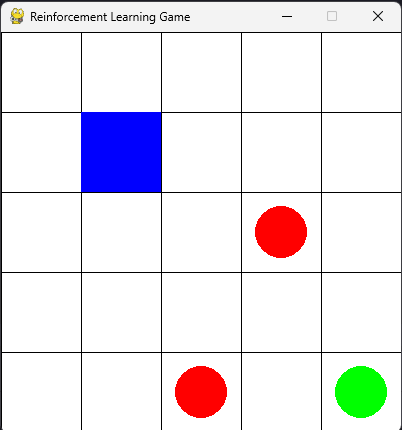

## Conclusion

This project successfully demonstrates how an agent can learn optimal navigation in a grid-based environment using Q-Learning. Over multiple episodes, the agent improves its performance, efficiently reaching the goal while avoiding obstacles. The reward system and gradual exploration decay play a critical role in shaping the agent's behavior, highlighting key RL principles such as trial-and-error learning and policy optimization. The implementation not only provides a hands-on understanding of RL but also serves as a starting point for more complex scenarios, such as multi-agent environments or neural network-based learning. This project reinforces the importance of balancing exploration and exploitation and underscores RL's potential for solving real-world problems in navigation, decision-making, and control systems.